In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import TensorDataset
from tqdm import tqdm

from kedro.extras.datasets.pickle import PickleDataSet

In [ ]:
import os, sys
sys.path.append(os.path.abspath('../src'))

from tagseg.data.utils import load_nii
from tagseg.data.mnm_dataset import MnmDataSet

### Information from CSV

In [3]:
raw_path = Path('../data/01_raw/OpenDataset/Training/Labeled')

In [4]:
df = pd.read_csv('../data/01_raw/OpenDataset/211230_M&Ms_Dataset_information_diagnosis_opendataset.csv', index_col=0)

In [5]:
df.head()

External code VendorName Vendor  Centre  ED  ES  Age Pathology Sex  Height  \
0        A0S9V9    Siemens      A       1   0   9   67       DCM   M   180.0   
1        A1D0Q7    Philips      B       2   0   9   79       HCM   F     NaN   
2        A1D9Z7    Siemens      A       1  22  11   53       HCM   M   175.0   
3        A1E9Q1    Siemens      A       1   0   9   16       DCM   M   175.0   
4        A1K2P5      Canon      D       5  33  11   35       DCM   F   170.0   

   Weight  
0    88.0  
1    88.0  
2    75.0  
3    75.0  
4     NaN

### Loading Dataset with custom loader

In [6]:
mnm = MnmDataSet(
    filepath='../data/03_primary/mnm_train.pt', 
    load_args=dict(
        filepath_raw = '../data/01_raw/OpenDataset/Training/Labeled',
        only_myo=True
    )
)

In [7]:
#!rm ../data/03_primary/mnm_train.pt

In [8]:
dataset = mnm.load()
# mnm.save(dataset)

In [9]:
len(dataset)

2468

In [ ]:
c_slice, c_phase = 6, 9

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].imshow(images[..., c_slice, c_phase], cmap='gray')
ax[1].imshow(labels[..., c_slice, c_phase], cmap='viridis')

masked = np.ma.masked_where(labels[..., c_slice, c_phase] == 0, labels[..., c_slice, c_phase])
ax[2].imshow(images[..., c_slice, c_phase], cmap='gray')
ax[2].imshow(masked, cmap='jet', interpolation='nearest', alpha=0.3)

In [ ]:
M, N = 20, 5
fig, ax = plt.subplots(M, N, figsize=(20, 100))

for i in range(M * N):
    m, n = i % M, i // M
    ax[m, n].imshow(dataset[i][0][0].cpu(), cmap='gray')
    
    mask = dataset[i][1].cpu()
    mask = np.ma.masked_where(mask == 0, mask)
    ax[m, n].imshow(mask, cmap='Reds', alpha=0.8)
    
    ax[m, n].axis('off')

In [4]:
model_input = PickleDataSet(filepath='../data/05_model_input/model_input.pt').load()

In [11]:
all_images = np.array(list(map(lambda a: a[0].flatten().numpy(), model_input)))

In [12]:
all_images.mean(), all_images.std()

(0.7507453, 0.18098551)

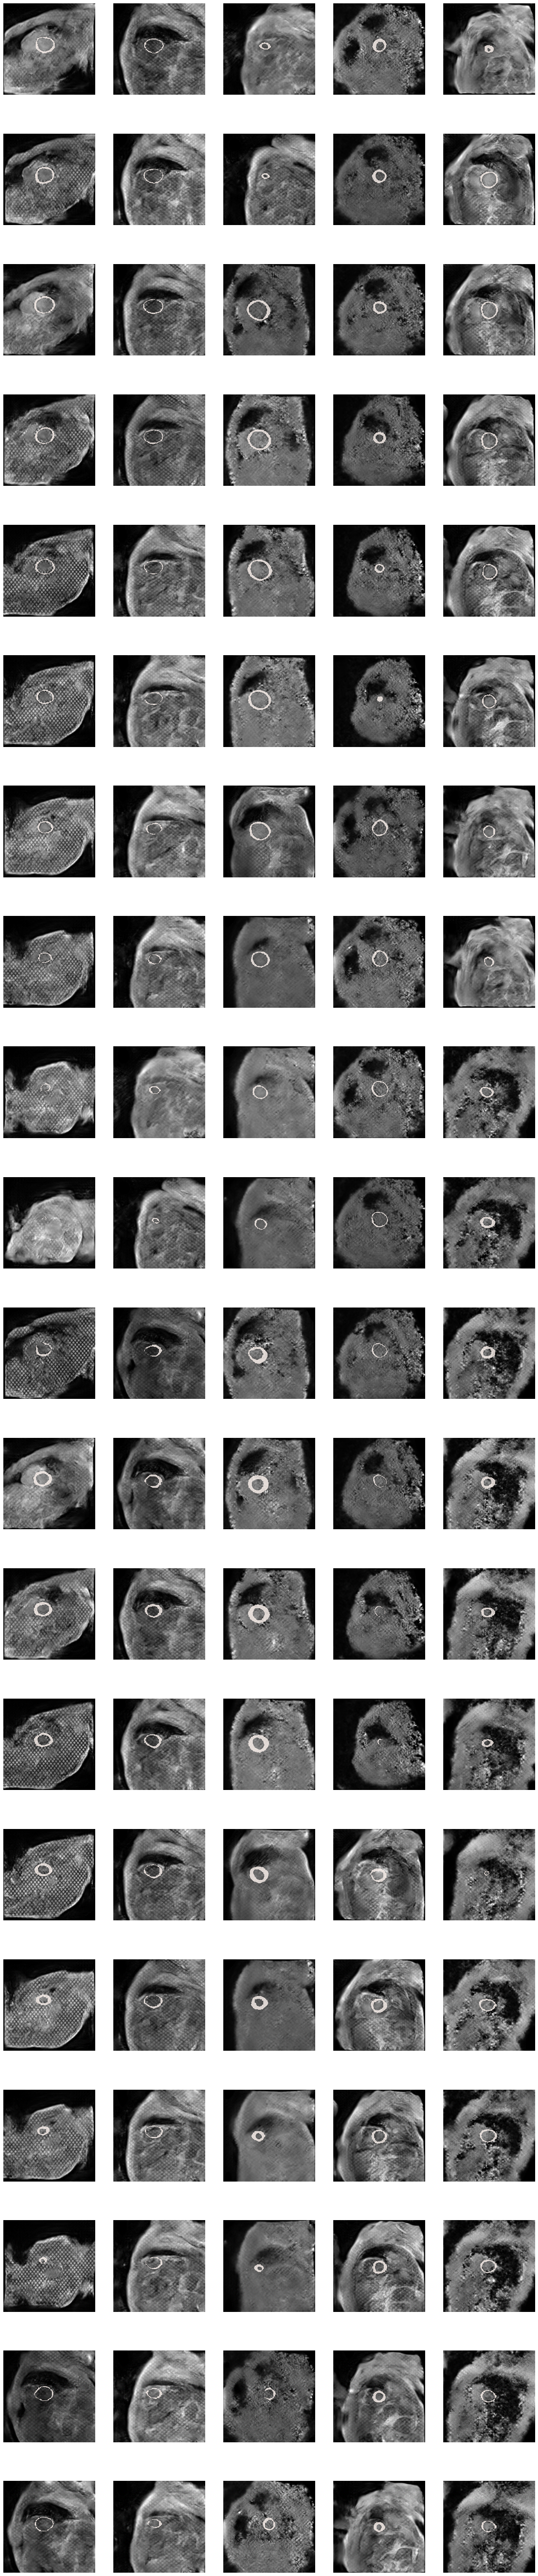

In [49]:
M, N = 20, 5
fig, ax = plt.subplots(M, N, figsize=(20, 100))

for i in range(M * N):
    m, n = i % M, i // M
    ax[m, n].imshow(model_input[i][0][0].cpu(), cmap='gray')
    
    mask = model_input[i][1][0].cpu()
    mask = np.ma.masked_where(mask == 0, mask)
    ax[m, n].imshow(mask, cmap='Reds', alpha=0.8)
    
    ax[m, n].axis('off')

In [3]:
from tagseg.data.mnm_dataset import MnmEvaluator

In [4]:
dataset = MnmEvaluator(filepath='../data/03_primary/mnm_test.pt').load()

In [5]:
len(dataset)

2416